In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns

from sklearn.metrics import confusion_matrix, f1_score

In [18]:
df = pd.read_csv('../LoanData.csv')
#https://www.bondora.com/en/public-reports#shared-legend for data descriptions
columnlst = []
for column in df.columns:
    columnlst.append(column)

df.shape

/tmp/ipykernel_1130228/1781382753.py:1: DtypeWarning: Columns (12,34,38,67,80,82,83,89,90) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../LoanData.csv')


(294903, 112)

In [19]:
#Wanted_lst containts all features that we want included
wanted_lst = ['Age', 'Gender', 'Country', 'AppliedAmount',
              'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment', 
              'UseOfLoan', 'Education', 'MaritalStatus', 'NrOfDependants', 
              'EmploymentStatus', 'EmploymentDurationCurrentEmployer', 
              'OccupationArea',
              'HomeOwnershipType', 'IncomeFromPrincipalEmployer', 'IncomeFromPension', 
              'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare', 'IncomeFromLeavePay', 
              'IncomeFromChildSupport', 'IncomeOther', 'IncomeTotal', 
              'ExistingLiabilities', 'LiabilitiesTotal',
              'DebtToIncome', 'FreeCash',
              'PlannedInterestTillDate', 
              'Status', 'NoOfPreviousLoansBeforeLoan', 
              'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan', 
              'PreviousEarlyRepaymentsBefoleLoan', 'PreviousEarlyRepaymentsCountBeforeLoan']
#Total list - Wanted List = Drop List
drop_lst = list(set(columnlst) - set(wanted_lst))
print(drop_lst)
df = df.drop(columns=drop_lst)
#Rename 'DefaultDate' and Binarize it to 1=defaulted, 0=not_defaulted
df['Status'] = np.where(df['Status'] == 'Late', 1 ,0)
df.shape

['PartyId', 'CurrentDebtDaysPrimary', 'InterestAndPenaltyWriteOffs', 'GracePeriodEnd', 'ExpectedLoss', 'PrincipalPaymentsMade', 'Rating_V2', 'ReportAsOfEOD', 'PrincipalWriteOffs', 'ReScheduledOn', 'WorkExperience', 'Rating_V1', 'ModelVersion', 'WorseLateCategory', 'BiddingStartedOn', 'PrincipalDebtServicingCost', 'EAD1', 'DebtOccuredOnForSecondary', 'PrincipalOverdueBySchedule', 'LoanApplicationStartedDate', 'ActiveScheduleFirstPaymentReached', 'RefinanceLiabilities', 'BidsPortfolioManager', 'ApplicationSignedHour', 'DateOfBirth', 'ExpectedReturn', 'LossGivenDefault', 'CreditScoreEeMini', 'VerificationType', 'BidsManual', 'City', 'EL_V1', 'FirstPaymentDate', 'RecoveryStage', 'EL_V0', 'Restructured', 'ProbabilityOfDefault', 'CurrentDebtDaysSecondary', 'LoanDate', 'InterestRecovery', 'ListedOnUTC', 'Rating', 'PlannedPrincipalTillDate', 'DefaultDate', 'NextPaymentDate', 'InterestAndPenaltyDebtServicingCost', 'PlannedPrincipalPostDefault', 'BidsApi', 'CreditScoreEsEquifaxRisk', 'InterestAn

(294903, 35)

In [20]:
df = df[df['EmploymentStatus']!=-1]

#Changing strings to integers
df = df[df['EmploymentDurationCurrentEmployer']!='TrialPeriod']
df = df[df['EmploymentDurationCurrentEmployer']!='Other']

df['EmploymentDurationCurrentEmployer'].replace('Retiree', 0, inplace=True)
df['EmploymentDurationCurrentEmployer'].replace('UpTo1Year', 1, inplace=True)
df['EmploymentDurationCurrentEmployer'].replace('UpTo2Years', 2, inplace=True)
df['EmploymentDurationCurrentEmployer'].replace('UpTo3Years', 3, inplace=True)
df['EmploymentDurationCurrentEmployer'].replace('UpTo4Years', 4, inplace=True)
df['EmploymentDurationCurrentEmployer'].replace('UpTo5Years', 5, inplace=True)
df['EmploymentDurationCurrentEmployer'].replace('MoreThan5Years', 6, inplace=True)

df['Country'].replace('EE', 0, inplace=True)
df['Country'].replace('ES', 1, inplace=True)
df['Country'].replace('FI', 2, inplace=True)
df['Country'].replace('NL', 3, inplace=True)
df['Country'].replace('SK', 4, inplace=True)

df['NrOfDependants'].replace('10Plus', 11, inplace=True)



inc_gp = df.groupby('Gender')['IncomeTotal'].mean()
amt_gp = df.groupby('Gender')['Amount'].mean()
age_gp = df.groupby('Gender')['Age'].mean()

df = df.fillna(0)

In [21]:
print(df.groupby('EmploymentStatus').size())
print(df.groupby('Gender')['IncomeTotal'].median())
print(df.groupby('Gender')['Amount'].mean())
print(df.groupby('Gender')['EmploymentStatus'].value_counts(normalize=True))
print(df.groupby('Gender')['Age'].mean())
print(df.groupby('Gender')['Interest'].mean())


print(np.unique(df['Status']))
print(df.groupby('Country').size())
df_noCurrent = df[df['Status']!='Current']
print(df_noCurrent.shape)
df = df.astype(int)

EmploymentStatus
0.0      234
2.0     1126
3.0    29675
4.0     1290
5.0     1989
6.0     1750
dtype: int64
Gender
0.0    1264.0
1.0    1000.0
2.0    1300.0
Name: IncomeTotal, dtype: float64
Gender
0.0    2589.247094
1.0    2452.114098
2.0    2091.361287
Name: Amount, dtype: float64
Gender  EmploymentStatus
0.0     3.0                 0.818402
        5.0                 0.068310
        6.0                 0.048027
        4.0                 0.036940
        2.0                 0.021281
        0.0                 0.007041
1.0     3.0                 0.834134
        6.0                 0.048458
        5.0                 0.044453
        2.0                 0.040315
        4.0                 0.026031
        0.0                 0.006608
2.0     3.0                 0.781570
        4.0                 0.096051
        2.0                 0.057045
        6.0                 0.053632
        5.0                 0.011214
        0.0                 0.000488
Name: EmploymentStatus, d

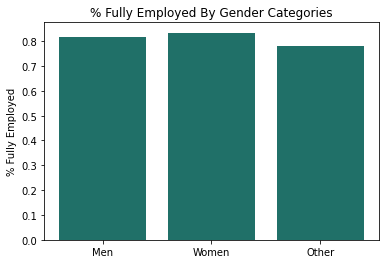

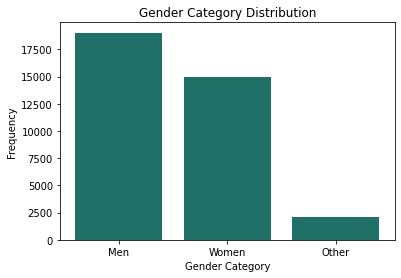

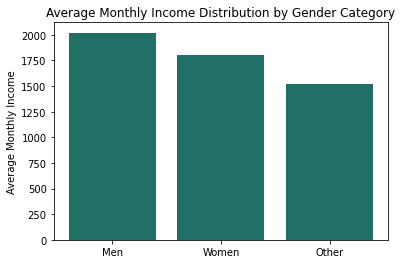

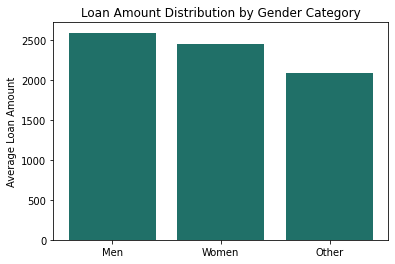

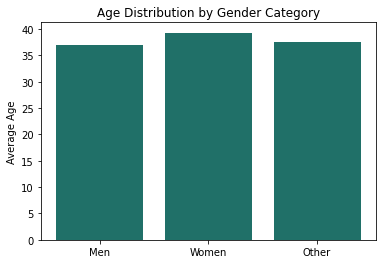

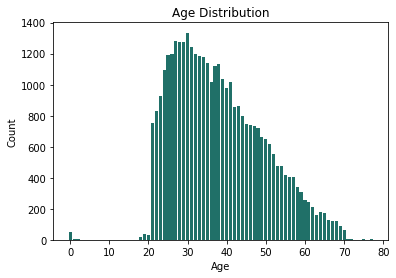

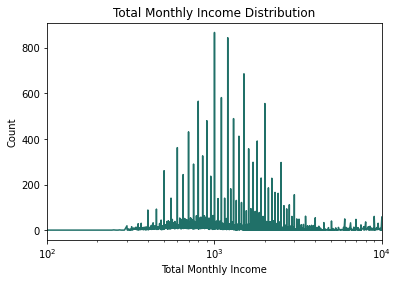

In [22]:
inc_gp = df.groupby('Gender')['IncomeTotal'].mean()
amt_gp = df.groupby('Gender')['Amount'].mean()
age_gp = df.groupby('Gender')['Age'].mean()
gend_cnt = df.groupby('Gender').size()
x_label = ["Men", "Women", "Other"]


# Create the bar plot
plt.bar(x_label, [0.818402, 0.834134, 0.781570], color='#207068')
# Set the y-axis label
plt.ylabel('% Fully Employed')
# Set the title of the plot
plt.title('% Fully Employed By Gender Categories')
# Show the plot
plt.show()

# Create the bar plot
plt.bar(x_label, gend_cnt, color='#207068')
# Set the y-axis label
plt.ylabel('Frequency')
plt.xlabel('Gender Category')
# Set the title of the plot
plt.title('Gender Category Distribution')
# Show the plot
plt.show()

# Create the bar plot
plt.bar(x_label, inc_gp, color='#207068')
# Set the y-axis label
plt.ylabel('Average Monthly Income')
# Set the title of the plot
plt.title('Average Monthly Income Distribution by Gender Category')
# Show the plot
plt.show()

# Create the bar plot
plt.bar(x_label, amt_gp, color='#207068')
# Set the y-axis label
plt.ylabel('Average Loan Amount')
# Set the title of the plot
plt.title('Loan Amount Distribution by Gender Category')
# Show the plot
plt.show()

# Create the bar plot
plt.bar(x_label, age_gp, color='#207068')
# Set the y-axis label
plt.ylabel('Average Age')
# Set the title of the plot
plt.title('Age Distribution by Gender Category')
# Show the plot
plt.show()

# Create the bar plot
unq, cnts = np.unique(df['Age'], return_counts=True)
plt.bar(unq, cnts, color='#207068')
# Set the y-axis label
plt.xlabel('Age')
plt.ylabel('Count')
# Set the title of the plot
plt.title('Age Distribution')
# Show the plot
plt.show()

# Create the bar plot
unq, cnts = np.unique(df['IncomeTotal'], return_counts=True)
plt.plot (unq, cnts, color='#207068')
plt.xscale("log")
plt.xlim(100, 10000)
# Set the y-axis label
plt.xlabel('Total Monthly Income')
plt.ylabel('Count')
# Set the title of the plot
plt.title('Total Monthly Income Distribution')
# Show the plot
plt.show()

In [23]:
df.to_csv('/home/DAVIDSON/iarolls/Workspace/CSC371/Credit-Risk---CSC371/LoanReshaped_E.csv', index = False)